## 1. Introduction to Seaborn

So far, we've mostly worked with plots that are quick to analyze and make sense of. Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader. We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization. In this mission, we'll explore how to quickly create plots that are suitable to statistical analysis using a specific library for this purpose.  

We'll be working with the [seaborn](http://seaborn.pydata.org/) visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0WS1ZUnpCeE1xTms">

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

The plotting functions try to do something useful when called with a minimal set of arguments, and they expose a number of customizable options through additional parameters. Some of the functions plot directly into a matplotlib axes object, while others operate on an entire figure and produce plots with several panels. In the latter case, the plot is drawn using a Grid object that links the structure of the figure to the structure of the dataset.

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), but full customization will require changing attributes on the matplotlib objects directly. The combination of seaborn’s high-level interface and matplotlib’s customizability and wide range of backends makes it easy to generate publication-quality figures.


Before we dive into seaborn, let's learn how to install it

>```python
conda install -c conda-forge seaborn 
```

## 1.1 Getting started

There are interesting tutorals over the internet about seaborn. In this mission is not our goal to give a complete course about seaborn. We just use the fuctions acoording to need. 

- https://elitedatascience.com/python-seaborn-tutorial
- http://seaborn.pydata.org/tutorial.html
- https://gist.github.com/mwaskom/8224591
- https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

## 2. Introduction to dataset

We'll be working with a data set of the passengers of the Titanic. The [Titanic shipwreck](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called **Titanic: Machine Learning from Disaster**. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. You can download the data set by navigating [to the data download](https://www.kaggle.com/c/titanic/data) page for the competition and creating a free account.

The data for the passengers is contained in two files:

- <span style="background-color: #F9EBEA; color:##C0392B">train.csv</span>: Contains data on 712 passengers
- <span style="background-color: #F9EBEA; color:##C0392B">test.csv</span>: Contains data on 418 passengers


Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the <span style="background-color: #F9EBEA; color:##C0392B">train.csv</span> file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in <span style="background-color: #F9EBEA; color:##C0392B">test.csv</span>, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in <span style="background-color: #F9EBEA; color:##C0392B">train.csv</span>:

- <span style="background-color: #F9EBEA; color:##C0392B">PassengerId</span> -- A numerical id assigned to each passenger.
- <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> -- Whether the passenger survived (**1**), or didn't (**0**).
- <span style="background-color: #F9EBEA; color:##C0392B">Pclass</span> -- The class the passenger was in.
- <span style="background-color: #F9EBEA; color:##C0392B">Name</span> -- the name of the passenger.
- <span style="background-color: #F9EBEA; color:##C0392B">Sex</span> -- The gender of the passenger -- male or female.
- <span style="background-color: #F9EBEA; color:##C0392B">Age</span> -- The age of the passenger. Fractional.
- <span style="background-color: #F9EBEA; color:##C0392B">SibSp</span> -- The number of siblings and spouses the passenger had on board.
- <span style="background-color: #F9EBEA; color:##C0392B">Parch</span> -- The number of parents and children the passenger had on board.
- <span style="background-color: #F9EBEA; color:##C0392B">Ticket</span> -- The ticket number of the passenger.
- <span style="background-color: #F9EBEA; color:##C0392B">Fare</span> -- How much the passenger paid for the ticker.
- <span style="background-color: #F9EBEA; color:##C0392B">Cabin</span> -- Which cabin the passenger was in.
- <span style="background-color: #F9EBEA; color:##C0392B">Embarked</span> -- Where the passenger boarded the Titanic.

Note:
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

Here's what the first few rows look like:

| PassengerId | Survived | Pclass | Name                                                | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin | Embarked |
|-------------|----------|--------|-----------------------------------------------------|--------|------|-------|-------|------------------|---------|-------|----------|
| 1           | 0        | 3      | Braund, Mr. Owen Harris                             | male   | 22.0 | 1     | 0     | A/5 21171        | 7.2500  |       | S        |
| 2           | 1        | 1      | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38.0 | 1     | 0     | PC 17599         | 71.2833 | C85   | C        |
| 3           | 1        | 3      | Heikkinen, Miss. Laina                              | female | 26.0 | 0     | 0     | STON/O2. 3101282 | 7.9250  |       | S        |


Let's remove columns like <span style="background-color: #F9EBEA; color:##C0392B">Name</span> and <span style="background-color: #F9EBEA; color:##C0392B">Ticket</span> that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Read <span style="background-color: #F9EBEA; color:##C0392B">train.csv</span> into a DataFrame named <span style="background-color: #F9EBEA; color:##C0392B">titanic</span>. Keep only the following columns:
    - **Survived**
    - **Pclass**
    - **Sex**
    - **Age**
    - **SibSp**
    - **Parch**
    - **Fare**
    - **Embarked**
2. Use the [DataFrame.dropna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method to remove rows containing missing values.

In [1]:
import pandas as pd
titanic = pd.read_csv('train.csv')
cols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
titanic = titanic[cols]
titanic.dropna(inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 3. Creating histogram in seaborn

Seaborn works similarly to the <span style="background-color: #F9EBEA; color:##C0392B">pyplot</span> module from <span style="background-color: #F9EBEA; color:##C0392B">matplotlib</span>. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the <span style="background-color: #F9EBEA; color:##C0392B">pyplot</span> module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call <span style="background-color: #F9EBEA; color:##C0392B">pyplot.show()</span>.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the <span style="background-color: #F9EBEA; color:##C0392B">Fare</span> column using the [seaborn.distplot()](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) function. 

<span style="background-color: #F9EBEA; color:##C0392B">seaborn.distplot()</span>  flexibly plot a univariate distribution of observations. This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn [kdeplot()](http://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) and [rugplot()](http://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) functions. It can also fit <span style="background-color: #F9EBEA; color:##C0392B">scipy.stats</span> distributions and plot the estimated PDF over the data.

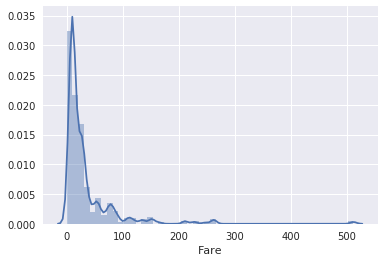

In [3]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns

#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")

# plot a univariate distribution of observations.
sns.distplot(titanic["Fare"])
plt.show()

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

What you need to know for now is that the resulting line is a smoother version of the histogram, called a **kernel density plot**. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Import **seaborn** as **sns** and **matplotlib.pyplot** as **plt**.
2. Use the **seaborn.distplot()** function to visualize the distribution of the **"Age"** column.
3. Display the plot using **pyplot.show()**.

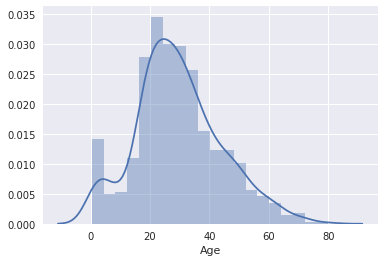

In [4]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns

#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")

# plot a univariate distribution of observations.
sns.distplot(titanic["Age"])
plt.show()

## 4. Generating A Kernel Density Plot

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the <span style="background-color: #F9EBEA; color:##C0392B">seaborn.kdeplot()</span> function:

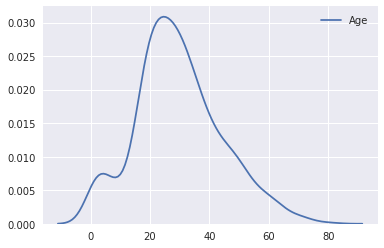

In [5]:
sns.kdeplot(titanic["Age"])
plt.show()

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the <span style="background-color: #F9EBEA; color:##C0392B">seaborn.kdeplot()</span> function, we can shade the area under the line by setting the <span style="background-color: #F9EBEA; color:##C0392B">shade</span> parameter to <span style="background-color: #F9EBEA; color:##C0392B">True</span>.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Generate a kernel density plot:
    - Using the values in the <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span> column
    - With the area under the curve shaded
2. Set the x-axis label to <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span> using <span style="background-color: #F9EBEA; color:##C0392B">pyplot.xlabel()</span>.

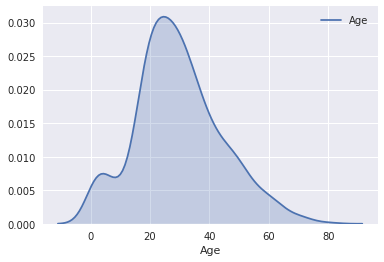

In [6]:
sns.kdeplot(titanic['Age'],shade=True)
plt.xlabel('Age')
plt.show()

## 5. Modifying The Appearance Of The Plots

From the plots in the previous step, you'll notice that seaborn:

- Sets the x-axis label based on the column name passed through <span style="background-color: #F9EBEA; color:##C0392B">plt.xlabel()</span> function
- Sets the background color to a light gray color
- Hides the x-axis and y-axis ticks
- Displays the coordinate grid


In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the <span style="background-color: #F9EBEA; color:##C0392B">seaborn.set_style()</span> function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

- <span style="background-color: #F9EBEA; color:##C0392B">darkgrid</span>: Coordinate grid displayed, dark background color
- <span style="background-color: #F9EBEA; color:##C0392B">whitegrid</span>: Coordinate grid displayed, white background color
- <span style="background-color: #F9EBEA; color:##C0392B">dark</span>: Coordinate grid hidden, dark background color
- <span style="background-color: #F9EBEA; color:##C0392B">white</span>: Coordinate grid hidden, white background color
- <span style="background-color: #F9EBEA; color:##C0392B">ticks</span>: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0OVQ1bDFuc2FuZmc">


By default, the seaborn style is set to <span style="background-color: #F9EBEA; color:##C0392B">"darkgrid"</span>:

>```python
sns.set_style("darkgrid")
```

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the <span style="background-color: #F9EBEA; color:##C0392B">seaborn.despine()</span> function:

>```python
sns.despine()
```

By default, only the top and right axes will be **despined**, or have their spines removed. To despine the other two axes, we need to set the <span style="background-color: #F9EBEA; color:##C0392B">left</span> and <span style="background-color: #F9EBEA; color:##C0392B">bottom</span> parameters to <span style="background-color: #F9EBEA; color:##C0392B">True</span>.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
2. Generate a kernel density plot of the <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span> column, with the area under the curve shaded.
3. Set the x-axis label to <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span>.
4. Despine all of the axes.


[]

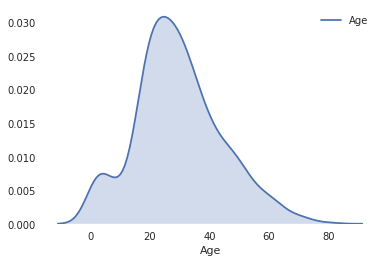

In [7]:
%matplotlib inline
sns.set_style('white')
sns.kdeplot(titanic['Age'],shade=True)
plt.xlabel('Age')
sns.despine(left=True,bottom=True)
plt.plot()

## 6. Conditional Distributions Using A Single Condition


In the last few missions, we created a [small multiple](https://en.wikipedia.org/wiki/Small_multiple), which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span> column where <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> equalled <span style="background-color: #F9EBEA; color:##C0392B">0</span> and the other would visualize the distribution of values in the <span style="background-color: #F9EBEA; color:##C0392B">"Age"</span> column where <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> equalled <span style="background-color: #F9EBEA; color:##C0392B">1</span>.

The code to generate the pair of plots, is short and sweet:

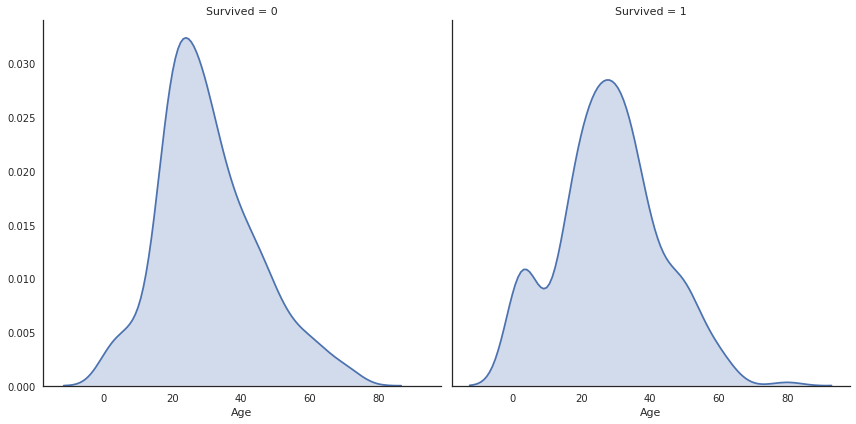

In [8]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)

# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

# Plot the graph
plt.show()

Seaborn handled:

- subsetting the data into rows where <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> is <span style="background-color: #F9EBEA; color:##C0392B">0</span> and where <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> is <span style="background-color: #F9EBEA; color:##C0392B">1</span>
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots


Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The [seaborn.FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word <span style="background-color: #F9EBEA; color:##C0392B">"facet"</span> from <span style="background-color: #F9EBEA; color:##C0392B">FacetGrid</span> is another word for <span style="background-color: #F9EBEA; color:##C0392B">"subset"</span>. Setting the col parameter to <span style="background-color: #F9EBEA; color:##C0392B">"Survived"</span> specifies a separate plot for each unique value in the <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the <span style="background-color: #F9EBEA; color:##C0392B">FacetGrid.map()</span> method to specify the plot we want for each unique value of <span style="background-color: #F9EBEA; color:##C0392B">Survived</span>. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into <span style="background-color: #F9EBEA; color:##C0392B">FacetGrid.map()</span> has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

>```python
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")
```

Let's create a grid of plots that displays the age distributions for each class.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Use a **FacetGrid** instance to generate three plots on the same row:
    - One for each unique value of **Pclass**.
    - Each plot should be a kernel density plot of the **"Age"** column, with the area under the curve shaded.
    - Each plot should have a height of **6** inches.
2. Remove all of the spines using **seaborn.despine()**.
3. Display the plots.


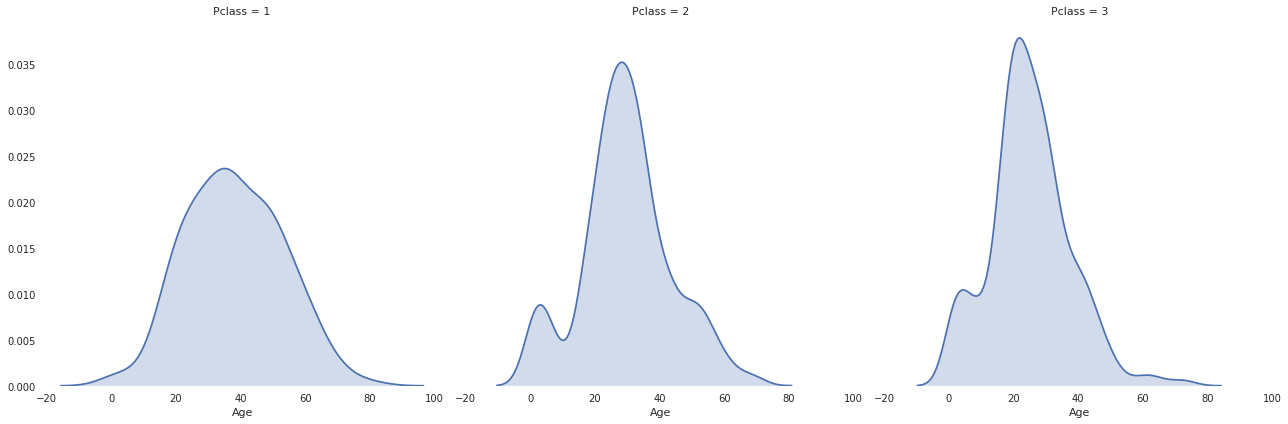

In [9]:
g = sns.FacetGrid(titanic, col='Pclass', size=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True,bottom=True)

## 7. Creating Conditional Plots Using Two Conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a  <span style="background-color: #F9EBEA; color:##C0392B">FacetGrid</span>, we use the <span style="background-color: #F9EBEA; color:##C0392B">row</span> parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the <span style="background-color: #F9EBEA; color:##C0392B">Pclass</span> and <span style="background-color: #F9EBEA; color:##C0392B">Survived</span> columns. Try changing the conditions to see the resulting plots.

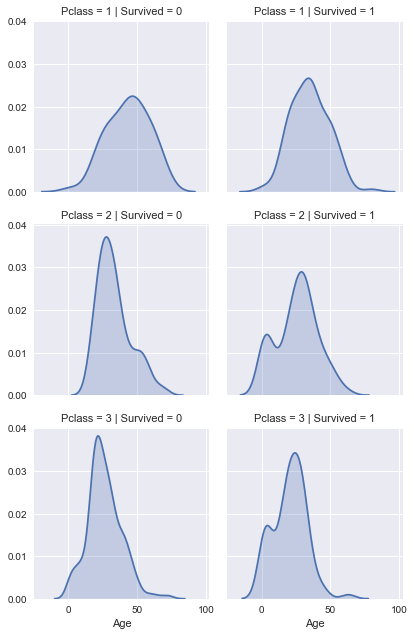

In [17]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()


## 8. Creating Conditional Plots Using Three Conditions

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the <span style="background-color: #F9EBEA; color:##C0392B">hue</span> parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Use a **FacetGrid** instance to generate a grid of plots using the following conditions:
    - The **Survived** column across the columns in the grid.
    - The **Pclass** column across the rows in the grid.
    - The **Sex** column using different hues.
2. Each plot should be a kernel density plot of the **"Age"** column, with the area under the curve shaded.
3. Each plot should have a height of **3** inches.
4. Remove all of the spines using **seaborn.despine()**.
5. Display the plots.

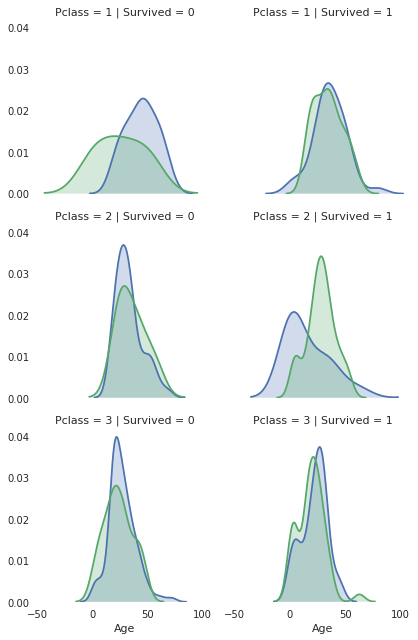

In [10]:
g = sns.FacetGrid(titanic,col='Survived',row='Pclass',hue='Sex',size=3)
g.map(sns.kdeplot,'Age',shade=True)
sns.despine(left=True,bottom=True)

## 9. Adding a legend

Now that we're coloring plots, we need a legend to keep track of which value each color represents. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the examples from the [page](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) on plotting using the FacetGrid instance.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Use a **FacetGrid** instance to generate a grid of plots using the following conditions:
    - The **Survived** column across the columns in the grid.
    - The **Pclass** column across the rows in the grid.
    - The **Sex** column using different hues.
2. Each plot should be a kernel density plot of the **"Age"** column, with the area under the curve shaded.
3. Each plot should have a height of **3** inches.
4. Add a legend for the **Sex** column.
5. Remove all of the spines using **seaborn.despine()**.
6. Display the plots.

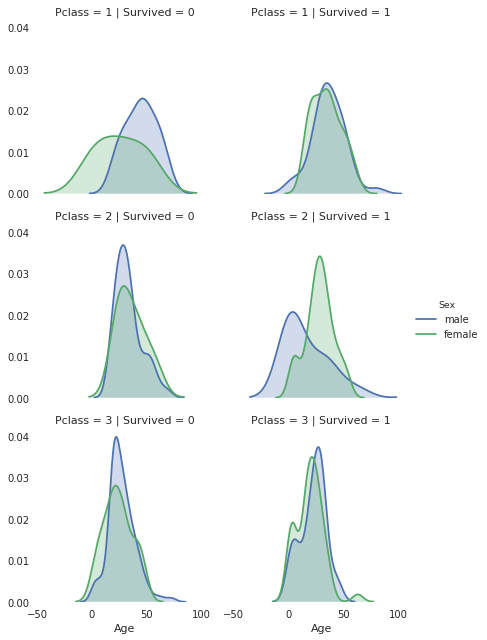

In [11]:
g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Sex', size=3)
g = (g.map(sns.kdeplot,'Age',shade=True).add_legend())
sns.despine(left=True,bottom=True)